# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [95]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd==1.2.0
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 살펴보기

In [3]:
df = pd.read_excel("./BostonHousing.xls")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

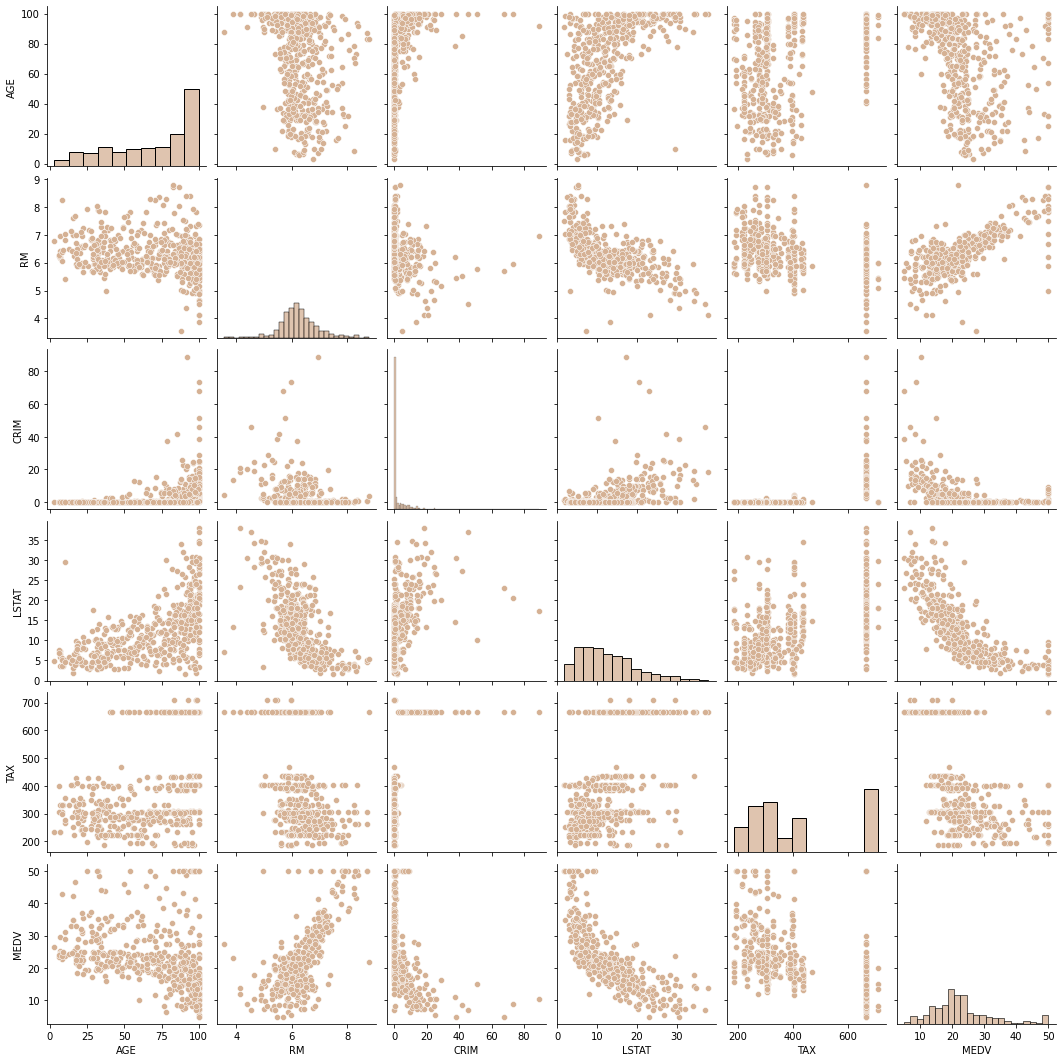

In [118]:
sns.pairplot(df[['AGE','RM','CRIM','LSTAT','TAX','MEDV']])
plt.show()

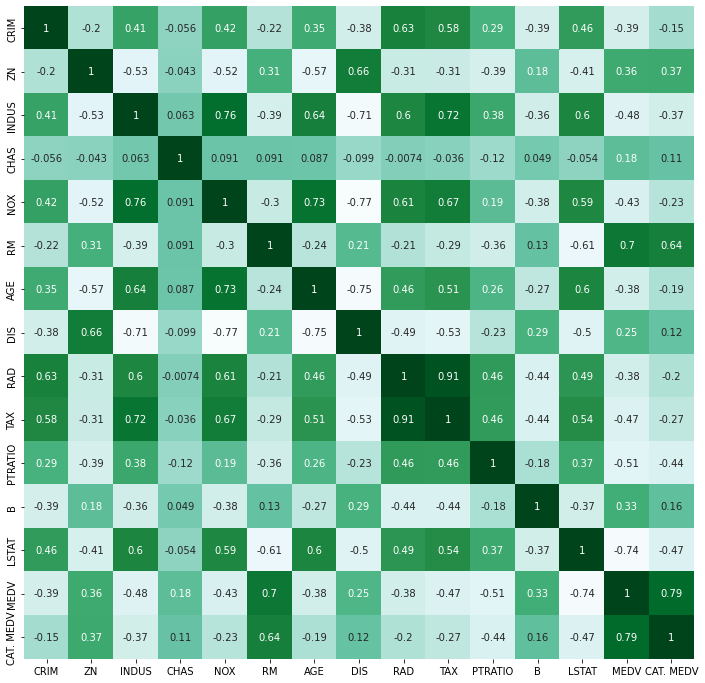

In [ ]:
df_c = df.corr() 
plt.figure(figsize=(12,12))
sns.set_palette("gist_earth_r")
sns.heatmap(df_c, annot=True, cmap="BuGn", cbar=False)
plt.show()

## 데이터 타입과 결측값 확인하기

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


## 데이터 분포 확인하기

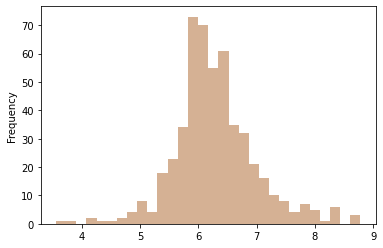

6.2 이상 : 0.7454769993310368 , 6.2 미만 : 0.23061643739187482


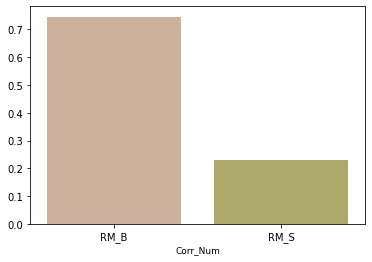

In [ ]:
# 대형 평수 vs 소형 평수
# ZN과 RM의 상관 계수는 0.31로 소량의 양의 상관관 계를 가지고 있음
# 평수에 대하여 평이 커질 수록 방이 많아지는 것이 일반적인 견해이나(RM) 대형 평수의 거주 비율은 평수 비율과 관련이 없다고 판단하여 RM 자료만 사용
df.RM.plot.hist(bins=30) # 5.5에서 6.5사이에 가장 많은 방이 분포가 되어있어 6.2 기준으로 방이 커질 때와 작아질 때의 주택 가격의 상관 계수를 계산
RM_B = df.loc[df.RM >= 6.2,'RM'].corr(df['MEDV'])
RM_S = df.loc[df.RM < 6.2,'RM'].corr(df['MEDV'])
plt.show()
print('6.2 이상 :',RM_B,", 6.2 미만 :",RM_S) # 방수가 6.2 이상은 0.745로 아주 큰 양의 상관 관계를 가지고 있으나 6 미만은 0.230으로 미량의 양의 상관 관계가 있음(방이 6개 미만일 때 방수와 주택가격의 큰 연관이 없음)
sns.barplot(x=['RM_B','RM_S'],y=[RM_B,RM_S])
plt.xlabel("Corr_Num",fontsize=9)
plt.show()

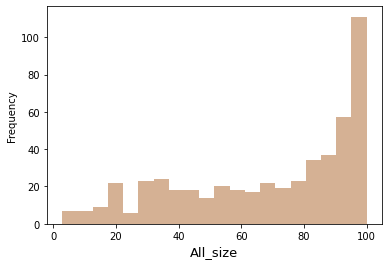

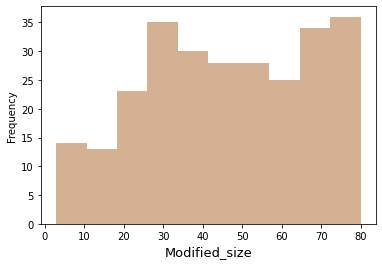

-0.19009962647438144
-0.20446257990420114


In [99]:
# 노후 정도와 집값의 관계
df.AGE.plot.hist(bins=20) # 노후화 집분포의 시각화
plt.xlabel("All_size",fontsize=13)
plt.show()
df[df.AGE < 80]["AGE"].plot.hist(bins=10) # 80% 미만의 자료 추출(특이값 별도 계산)
plt.xlabel("Modified_size",fontsize=13)
plt.show()
age_old = df[df.AGE >= 80]["AGE"].corr(df['MEDV']) # 노후화가 밀집된 곳의 주택가격 상관 계수 계산
age_young = df[df.AGE < 80]["AGE"].corr(df['MEDV']) # 표본이 AGE 80% 미만은 분포의 크기가 비슷하여 노후가 덜 된 곳도 상관 계수를 측정
# 노후 아파트가 80% 이상인 지역과 주택 가격의 상관 계수를 계산하였을 때 약 -0.19의 음의 상관 관계가 나오는 것을 알 수있고 이는 주택가격과 큰 연관이 없다는 것을 알 수 있음
# 노후 아파트가 80% 미만인 지역 또한 -0.20의 수치로 주택 가격은 노후된 상태에 크게 영향을 받지 않는다는 것을 알 수 있음
print(age_old)
print(age_young)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


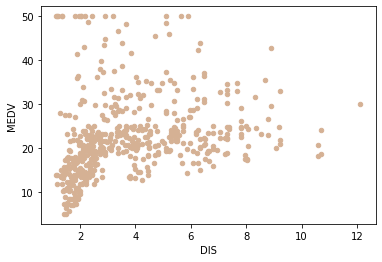

0.3004152384173119
0.2679572017390116
0.24750749386781573


In [152]:
# 직장과 인접한 주택의 가격 관계
df.plot.scatter(x='DIS',y='MEDV')
plt.show()
print(df.loc[df['DIS'] < 6, 'DIS'].corr(df['MEDV'])) # DIS ~6 상관 계수
print(df.loc[df['DIS'] < 8, 'DIS'].corr(df['MEDV'])) # DIS ~8의 상관 계수
print(df.loc[df['DIS'] < 11, 'DIS'].corr(df['MEDV'])) # DIS ~11 상관 계수
# 인접한 곳은 거리가 따라 가격이 변동이 있어어 상대적으로 높은 상관계수가 있지만 일정 거리를 넘어가면 상관 계수가 점점 낮아짐
# 주택 가격에는 크게 유의미한 자료가 아닌 것을 볼 수 있음

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


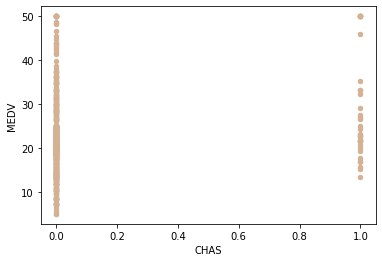

Far : 22.093842887473482 , Near : 28.44


In [136]:
# 찰스강과 인접한 주택의 가격 관계
df.plot.scatter(x='CHAS',y='MEDV')
plt.show()
far = df[df['CHAS']==0]['MEDV'].mean()
near = df[df['CHAS']==1]['MEDV'].mean()
print("Far :",far,", Near :", near) # 평균은 인접한 주택이 더 높지만 상관 계수가 낮기 때문에 관련이 높다고 정의할 수 없음

<Figure size 648x648 with 0 Axes>

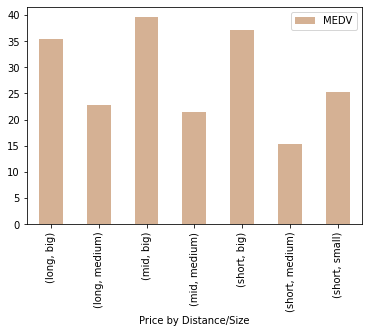

In [ ]:
# 직장이 가까우면서 소형 평수인 부동산의 가격
# 직장 거리의 범위 : 1.1 ~ 12.1
how = {
    'MEDV' : np.mean
}

def dist(x): # 거리에 따른  분류
  if x < 2:
    return "short"
  elif x < 6:
    return "mid"
  else:
    return "long"

def room(x):
  if x < 4:
    return "small"
  elif x < 7:
    return "medium"
  else:
    return "big"
df['DIST'] = df['DIS'].map(dist) # 분류한 카테고리를 입력 
df['RMSZ'] = df['RM'].map(room)
Prices = df.groupby(['DIST','RMSZ']).agg(how) # 나눈 카테고리 별 평균 가격. 입력
plt.figure(figsize=(9,9))
Prices.plot.bar()
plt.xlabel("Price by Distance/Size")
plt.show() # 집의 크기가 중간인 곳은 어디든 제일 저렴하고 방 수가 엄청 큰 집이 아니면 방수가 적은 곳이 더 비싸다

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>